In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl

# import seaborn as sns
# plt.style.use('seaborn-darkgrid')

import glob
from matplotlib import rcParams, rc

# rcParams['font.family'] = 'sans-serif'
# rc('font',**{'family':'serif','serif':['Times']})


In [2]:
data = {
    'actively_learned_koopman' : {20 : [], 25 :[], 30 : [], 
                                  35: [], 40 : [], 45:[], 50:[], 55:[], 60:[]},
    'stable_koopman' : {20 : [], 25 :[], 30 : [], 
                                  35: [], 40 : [], 45:[], 50:[], 55:[], 60:[]},
}

stable_koopman = []
unstable_koopman = []

for fpath in glob.glob('data/*.pkl'):
    _data = pkl.load(open(fpath, 'rb'))
    data[_data['kind']][_data['T']].append(_data['err'])
#     stable_koopman.append()

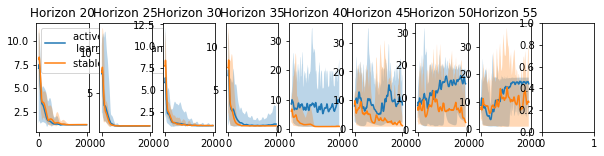

In [3]:
fig, ax = plt.subplots(1, 9, figsize=(10,2))

x = [i for i in range(2000)]
Ts = [20, 25, 30, 35, 40, 45, 50, 55]

J = {'al' : [], 'stab' :[]}
J_std = {'al': [], 'stab' :[]}

for i, T in enumerate(Ts):
    mean = np.mean(data['actively_learned_koopman'][T], axis=0)
    ax[i].plot(mean, label='actively \n learned koopman')
    ax[i].fill_between(
        x, 
        np.min(data['actively_learned_koopman'][T], axis=0),
        np.max(data['actively_learned_koopman'][T], axis=0), alpha=0.3
    )
    ax[i].grid(False)
    J['al'].append(np.mean(mean)) 
    J_std['al'].append(np.std(data['actively_learned_koopman'][T]))

    
    mean = np.mean(data['stable_koopman'][T], axis=0)
    ax[i].plot(mean, label='stable koopman')
    ax[i].fill_between(
        x, 
        np.min(data['stable_koopman'][T], axis=0),
        np.max(data['stable_koopman'][T], axis=0), alpha=0.3
    )
    J['stab'].append(np.mean(mean)) 
    J_std['stab'].append(np.std(data['stable_koopman'][T]))

#     ax[i].set_ylim(0.2, 20)
    ax[i].set_title('Horizon ' + str(T))
ax[0].legend()

plt.savefig('updated_fig.pdf')
plt.show()

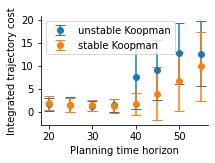

In [13]:
# import pylustrator
# pylustrator.start()

# Ts = [ts/200. for ts in Ts]
plt.figure(figsize=(3,2))
ax = plt.subplot(111)
ax.errorbar(Ts, J['al'], J_std['al'], 
            linestyle='None', fmt='-o', capsize=5, label='unstable Koopman')
ax.errorbar(Ts, J['stab'], J_std['stab'], 
            linestyle='None', fmt='-o', capsize=5, label='stable Koopman')
ax.set_xlabel('Planning time horizon')
ax.set_ylabel('Integrated trajectory cost')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend()
# plt.show()

In [9]:
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)